In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

# Exercise 

We will recreate the visualization from Datawrapper. I cleaned the data for you already. 

In [2]:
# You don't have to run this: this is how the data was cleaned 

# import pandas as pd 
# d = pd.read_csv('apple_data.csv', delimiter=';')
# d['Date'] = pd.PeriodIndex(d['Quarter'].str.split(' ').apply(lambda x: ''.join(x[::-1])), freq='Q').to_timestamp()
# for c in ['iPhone','iPad','Mac','iPod']: 
#     d[c] = d[c].str.replace(',','.').astype(float)
# d.to_csv('apple_data_clean.csv', index=False)

Task: recreate this visualization (without making the lines curved and with dummy text): 

<img src='VAHvu-iphone-more-successful-than-all-other-apple-products.png' width="600" height="400">


https://www.datawrapper.de/_/0192x/ 

Here a process how this chart has been designed: https://blog.datawrapper.de/better-charts/

If you use Matplotlib for handling the datetime, see https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html. But if we use pandas, we can also use a hack: instead of using Quarters as string, we can convert the year from integer to float, e.g. Q3 2000 would be 2000.75.  

In [3]:
d = pd.read_csv('apple_data_clean.csv')

In [4]:
d.head()

,Quarter,iPhone,iPad,Mac,iPod,Date
0,Q3 2000,NaN,NaN,1.1,NaN,2000-07-01
1,Q4 2000,NaN,NaN,0.6,NaN,2000-10-01
2,Q1 2001,NaN,NaN,0.7,NaN,2001-01-01
3,Q2 2001,NaN,NaN,0.8,NaN,2001-04-01
4,Q3 2001,NaN,NaN,0.8,NaN,2001-07-01


In [5]:
# some time wrangling to get you started 

def quarter_to_num(q):
    qs = q.split(' ')
    year = qs[1]
    qnum = qs[0][-1]
    qfrac = (float(qnum)-1)/4
    return float(year)+qfrac

d['Quarter_hacked'] = d['Quarter'].apply(quarter_to_num)

d['Date_dt'] = pd.to_datetime(d['Date'])

In [6]:
d.head()

,Quarter,iPhone,iPad,Mac,iPod,Date,Quarter_hacked,Date_dt
0,Q3 2000,NaN,NaN,1.1,NaN,2000-07-01,2000.50,2000-07-01
1,Q4 2000,NaN,NaN,0.6,NaN,2000-10-01,2000.75,2000-10-01
2,Q1 2001,NaN,NaN,0.7,NaN,2001-01-01,2001.00,2001-01-01
3,Q2 2001,NaN,NaN,0.8,NaN,2001-04-01,2001.25,2001-04-01
4,Q3 2001,NaN,NaN,0.8,NaN,2001-07-01,2001.50,2001-07-01


Example how to go forward: 
- prototype the line plot using pandas DataFrame 
- figure out the styling of the lines 
- set the x,y ticks locations 
- customize the x,y tick looks 
- create grid lines 
- customize how do the spines look 
- annotate the region 
- create the title and subtitle 
- create the footnote 
- create the "legend" 

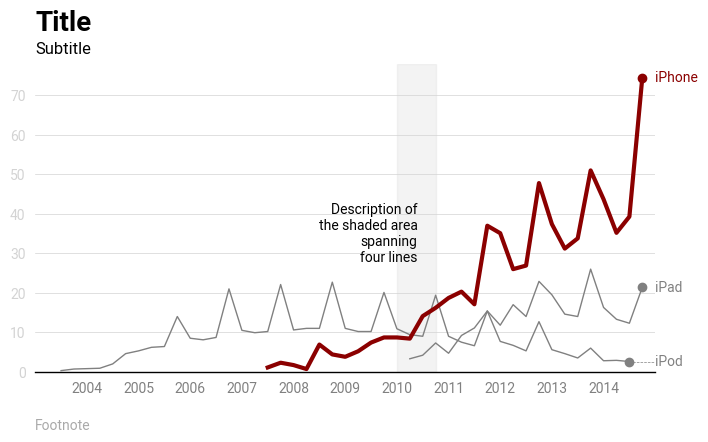

In [7]:
highlighted = {'color':'darkred', 'linewidth': 3, 'zorder':9}
other = {'color':'gray', 'linewidth':1}

to_hl = 'iPhone'

font_rc = {'font.family': 'Roboto', 'font.stretch':'expanded'}

with plt.rc_context(rc=font_rc):

    f, ax = plt.subplots(figsize=(8,4))

    lines = []
    texts = []

    ax.set_xlim(2003, 2015)
    ax.set_ylim([0,78]);

    for c in ['iPhone', 'iPad', 'iPod']:
        if c==to_hl:
            style = highlighted
        else: 
            style = other
        l = ax.plot(d['Quarter_hacked'], d[c], **style)
        last_marker = d[['Quarter_hacked',c]].dropna().iloc[-1]
        ax.scatter(x=last_marker['Quarter_hacked'], y=last_marker[c], 
                   color=style['color'], marker='o')
        textx = max(ax.get_xlim())
        t = ax.text(x=textx, y=last_marker[c], s=c, color=style['color'], 
                   ha='left', va='center')
        lines.append(l)
        texts.append(t)
        if c=='iPod':
            ax.plot([last_marker['Quarter_hacked'], textx], [last_marker[c], last_marker[c]], 
                   color=style['color'], linestyle='--', linewidth=0.5)

    for s in ['left', 'top', 'right']:
        ax.spines[s].set_visible(False) 

    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)

    ax.grid(axis="y", color="lightgray", linestyle="-", linewidth=0.5)

    ax.tick_params(axis='both', width=0)

    from matplotlib.ticker import MultipleLocator 

    ax.yaxis.set_major_locator(MultipleLocator(10))

    xticks = np.arange(2004,2015,1)
    ax.set_xticks(xticks)

    ax.tick_params(axis='x', which='major', 
                   labelcolor="gray") 
    ax.tick_params(axis='y', which='major', 
                   labelcolor="lightgray") 


    title1 = ax.set_title('Title', pad=24, loc='left', fontsize=20, fontweight="bold");
    subtitle1 = ax.annotate(xy=(0,-0.2), text="Subtitle", 
                       xycoords=title1,  ha='left', va='top', fontsize=12) 

    footnote1 = ax.text(x=0, y=-0.15, s='Footnote', 
                        transform=ax.transAxes, ha='left', va='top', 
                       c='darkgray')


    ax.axvspan(2010, 2010.75, color="lightgray", zorder=1, alpha=0.25);
    ax.text(x=2010.4, y=43, s='Description of\nthe shaded area\nspanning\nfour lines', 
                        ha='right', va='top', 
                       c='black')